In [1]:
from math import sqrt
from scipy import stats

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pydataset import data
import statistics

### Has the network latency gone up since we switched internet service providers?

Reword: What is our current network latency and how does it compare to the previous latency?

H_0: Changing ISP did not affect latency

H_A: Changining ISP increased latency

True Negative: We do not think latency changed, and it didn't
False Negative: We do not think latency changed, but it did
False Positive: We think latency changed, but it didn't
True Positive: We think latency changed, and it did

### Is the website redesign any good?

Reword: Is customer perception of the new design positive?

H_0: Customer perception is unchanged

H_A: Custome perception has improved

True Negative: We do not think perception changed, and it didn't
False Negative: We do not think perception changed, but it did
False Positive: We think perception changed, but it didn't
True Positive: We think perception changed, and it did

### Is our television ad driving more sales?

Reword: Since the release of the new ad, what has happened to sales?

H_0: Sales have stayed the same-->as relates to the ad

H_A: Sales have increased

True Negative: We do not think sales went up, and they didn't
False Negative: We do not think sales went up, but they did
False Positive: We think sales increased, but they didn't
True Positive: We think sales increased, and they did

## Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
- A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
- A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
## Use a .05 level of significance.

In [2]:
office_1_sample = 40
office_2_sample = 50

office_1_μ = 90
office_1_σ = 15
office_2_μ = 100
office_2_σ = 20
office_1_var = office_1_σ ** .5
office_2_var = office_2_σ ** .5

alpha = .05

#### h_o: the avg sale time for office 1 is = office 2
#### h_a: the avg sale time for office 1 is != office 2


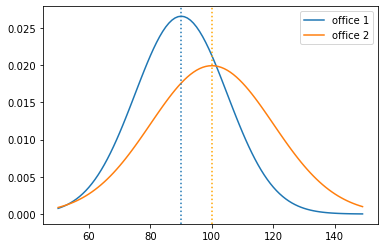

In [3]:
x = np.arange(50,150)

y1 = stats.norm(90,15).pdf(x)
y2 = stats.norm(100,20).pdf(x)


plt.plot(x, y1, label = 'office 1')
plt.plot(x, y2, label = 'office 2')
plt.axvline(90, ls = ':')
plt.axvline(100, ls = ':', color = 'orange')

plt.legend()

In [4]:
stats.ttest_ind_from_stats(office_1_μ,office_1_σ,office_1_sample,office_2_μ,office_2_σ, office_2_sample,equal_var=True)
#stats.ttest_1samp and _ind didn't work here b/c of the type of sample

Ttest_indResult(statistic=-2.6252287036468456, pvalue=0.01020985244923939)

In [5]:
# adjust this according to ravinder's solutions
# print(f'''
# Because the p-value ({p}) is less than alpha value ({α}),we reject the null hypothesis''')

### The t-test is < 0 and the p-value is less than alpha

### Therefore....we reject the null hypothesis

In [6]:
#this was a two-tailed test (because we were checking for DIFFERENCE rather than greater or lesser)
#Therefore, we don't concern ourselves with T-statistic, only with P, which needs to be less than alpha

# Load the mpg dataset and use it to answer the following questions:

# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [7]:
from pydataset import data
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [8]:
# HARMONIC MEAN MORE MATHEMATICALLY CORRECT IN THIS SCENARIO
mpg['avg_mpg'] = stats.hmean(mpg[['cty','hwy']], axis = 1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [9]:
mpg_08 = mpg[mpg.year == 2008].avg_mpg
mpg_99 = mpg[mpg.year == 1999].avg_mpg

### 1. Plot the distributions

<AxesSubplot:>

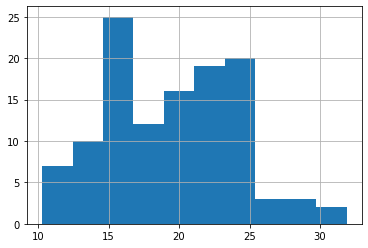

In [10]:
mpg_08.hist()

<AxesSubplot:>

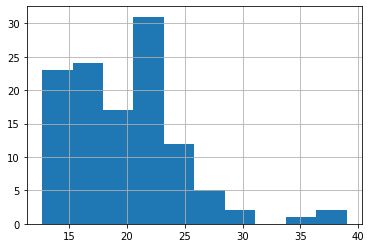

In [11]:
mpg_99.hist()

### 2. Establish hypotheses

- this is two different sub groups, so 2-sample, 2-tailed test (looking for difference, not ">" or "<")

h_o: the mpg for 08 == mpg for 99

h_a: the mpg for 08 != mpg for 99

### 3. Set significance level

In [12]:
α = 0.05

### 4. Verify Assumptions: 
 
    - Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)  CHECK
    - Independent samples  CHECK
    - Equal Variances (or set method argument to False when not)....SEE BELOW

In [13]:
mpg_08.var(), mpg_99.var()

(22.550836772260343, 25.850396545865912)

In [14]:
# stats levene test-- returns p value.  small p means unequal variances
stats.levene(mpg_08, mpg_99)
# high p suggests that the popluations have equal variances

LeveneResult(statistic=0.031071867429515194, pvalue=0.8602339200830025)



### 5. Compute test statistic and probability (t-statistic & p-value) using `stats.ttest_ind`



In [15]:
t, p = stats.ttest_ind(mpg_08, mpg_99, equal_var = False)
t, p, α
#in other words, there is an 82% chance that the difference is due to chance

(-0.3011962975077886, 0.7635358418225436, 0.05)

### 6. Decide. 

In [16]:
#p is > than α in this case....
#so, FAIL TO REJECT NULL HYPOTHESIS

In [17]:
print(f'''
Because p ({p:.3f}) > alpha (.05), we fail to reject the null\
 hypothesis that there is no difference in fuel-efficency in cars\
 from 2008 and 1999.''')


Because p (0.764) > alpha (.05), we fail to reject the null hypothesis that there is no difference in fuel-efficency in cars from 2008 and 1999.


In [18]:
mpg_08.mean(), mpg_99.mean()

(19.488662986569054, 19.68238764869729)

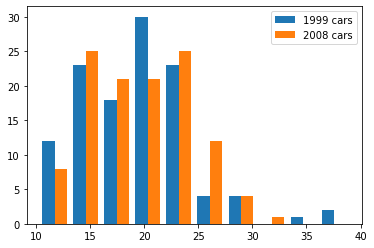

In [19]:
plt.hist([mpg_99, mpg_08], label=["1999 cars", "2008 cars"])
plt.legend(loc="upper right")

# Are compact cars more fuel-efficient than the average car?

- 1 sample vs 2 sample? --> this is 1 sample (the other half of the equation is the population mean)
- 1 tailed vs 2 tailed? --> 1 tailed b/c we are looking for > or <

In [20]:
mpg.rename(columns={'class':'car_class'},inplace = True)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,car_class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [21]:
mpg_compact = mpg[mpg.car_class == 'compact'].avg_mpg
mpg_all = mpg.avg_mpg

### 1. plot

<AxesSubplot:>

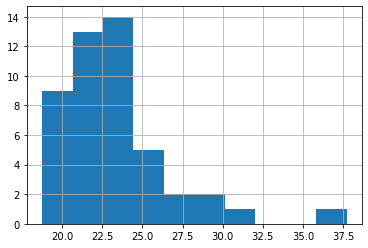

In [22]:
mpg_compact.hist()

<AxesSubplot:>

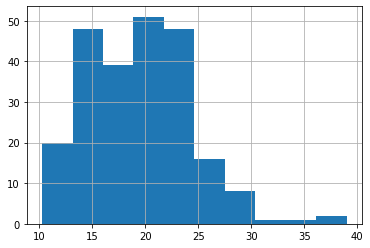

In [23]:
mpg_all.hist()

### 2. hypotheses

h_o: compact mpg <= all mpg

h_a: compact mpg > all mpg

### 3. significance level

In [24]:
α = 0.05

### 4. Verify Assumptions: 
 
    - Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)  CHECK
    - Equal Variances (or set method argument to False when not)....SEE BELOW

In [25]:
mpg_compact.var(), mpg_all.var()

(12.763933193960233, 24.106173930122633)

### 5. Compute test statistic and probability (t-statistic & p-value) using `stats.ttest_ind`



In [26]:
# i ran the test as one sample--1 subgroup, compact,  vs the whole meann
t, p = stats.ttest_1samp(mpg_compact, mpg_all.mean())
t, p / 2, α

(7.512360093161354, 7.808833174403864e-10, 0.05)

### 6. Decide

In [27]:
#t > 0 and p < α
#therefore, we reject the null hypothesis

# Do manual cars get better gas mileage than automatic cars?

- 1 sample or two? two
- 1 tail or two? one

In [28]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,car_class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [29]:
mpg_manual = mpg[mpg.trans.str.contains('manual')].avg_mpg
mpg_auto = mpg[mpg.trans.str.contains('auto')].avg_mpg

### 1. Plot the distributions

<AxesSubplot:>

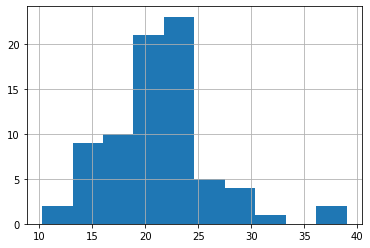

In [30]:
mpg_manual.hist()

<AxesSubplot:>

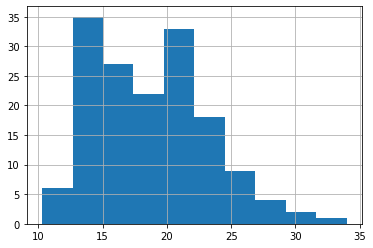

In [31]:
mpg_auto.hist()

### 2. Hypotheses

h_o: manual cars get the same or less mileage as automatics

h_a: manual cars get better mileage than automatics

### 3. Significance

In [32]:
α = 0.05

### 4. Verify Assumptions

- Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)  CHECK
- Independent samples  CHECK
- Equal Variances (or set method argument to False when not)....SEE BELOW

In [33]:
mpg_manual.var(), mpg_auto.var()

(25.665633639828275, 20.428279095002054)

### 5. T-stat and p-value

In [34]:
t, p = stats.ttest_ind(mpg_manual, mpg_auto, equal_var = False)
t, p / 2, α
# don't forget to divide the p by 2, since this is a 1 tailed test!

(4.47444321386703, 7.99035135103976e-06, 0.05)

In [35]:
stats.levene(mpg_manual, mpg_auto)

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

### 6. Decide

In [36]:
#t > 0 and p < α
#therefore, we reject the null hypothesis

In [37]:
print(f'''
Because p/2 ({p/2:.6f}) < alpha (.05), we reject the null hypothesis''')


Because p/2 (0.000008) < alpha (.05), we reject the null hypothesis


In [38]:
mpg['transmission_type'] = np.where(mpg.trans.str.contains('auto'), 'Auto Transmission', 'Manual Transmission')

Text(0.5, 1.0, 'Is mileage different by transmission type?')

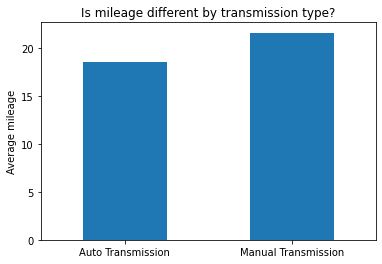

In [39]:
mpg.groupby('transmission_type').avg_mpg.mean().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Average mileage')
plt.title('Is mileage different by transmission type?')

# CORRELATION EXERCISES

## 1. Use the telco_churn data.

In [40]:
# read the .csv into pandas DF
telco = pd.read_csv('telco_churn.csv')
telco = pd.DataFrame(telco)
# drop null values to assist future calculations
telco = telco.dropna()
telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### Does tenure correlate with monthly charges? 

In [41]:
# assign corresponding columns as x and y variables for ease of use
tenure = telco.tenure
monthly_charges = telco.MonthlyCharges


#apply pearson test to get the correlation and p-value
corr, p = stats.pearsonr(tenure, monthly_charges)
corr, p

(0.24686176664089346, 3.9898213232673846e-98)

In [42]:
#write down your null and alternate hypotheses

### Total charges? 

In [43]:
# same idea as above
total_charges = telco.TotalCharges


corr, p = stats.pearsonr(tenure, total_charges)
corr, p
#notice the miniscule p value, rounded to zero

(0.825880460933202, 0.0)

### What happens if you control for phone and internet service?

In [44]:
telco.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5549,0329-GTIAJ,Female,0,No,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,97.90,315.30,Yes
2142,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,Yes,...,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80,No
1514,5799-JRCZO,Female,0,No,Yes,63,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.50,1215.10,No
5055,6925-BAYGL,Female,1,Yes,No,53,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.10,1275.60,No
1631,4248-QPAVC,Female,1,Yes,No,17,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),85.35,1463.45,Yes


In [45]:
# assign the 'hasphone' tenure group according to the values in the PhoneService column
tenure_hasphone = telco[telco.PhoneService == "Yes"].tenure
monthly_charges_hasphone = telco[telco.PhoneService == "Yes"].MonthlyCharges
# remember your basics of returning only monthly charges on the rows with "Yes" for PhoneService

tenure_hasphone, monthly_charges_hasphone
#just checking length and dtype here:

(1       34
 2        2
 4        2
 5        8
 6       22
         ..
 7037    72
 7038    24
 7039    72
 7041     4
 7042    66
 Name: tenure, Length: 6352, dtype: int64,
 1        56.95
 2        53.85
 4        70.70
 5        99.65
 6        89.10
          ...  
 7037     21.15
 7038     84.80
 7039    103.20
 7041     74.40
 7042    105.65
 Name: MonthlyCharges, Length: 6352, dtype: float64)

#### THIS WOULD BE THE CORRELATION FOR TENURE AND MONTHLY CHARGES FOR THOSE WHO HAVE PHONE SVC

In [46]:
# and, we're ready to calculate
corr, p = stats.pearsonr(tenure_hasphone, monthly_charges_hasphone)
corr, p

(0.2441939657519323, 6.82801603762022e-87)

#### AND FOR NO PHONE SERVICE:

In [47]:
tenure_NOphone = telco[telco.PhoneService == "No"].tenure
monthly_charges_NOphone = telco[telco.PhoneService == "No"].MonthlyCharges

corr, p = stats.pearsonr(tenure_NOphone, monthly_charges_NOphone)
corr, p

(0.5924298640568983, 1.1732739032891168e-65)

#### For customers with DSL

In [48]:
tenure_DSL = telco[telco.InternetService == "DSL"].tenure
monthly_charges_DSL = telco[telco.InternetService == "DSL"].MonthlyCharges

corr, p = stats.pearsonr(tenure_DSL, monthly_charges_DSL)
corr, p

(0.5197012004433113, 2.889518579135088e-167)

#### For Customers with Fiber optic

In [49]:
tenure_fiber = telco[telco.InternetService == "Fiber optic"].tenure
monthly_charges_fiber = telco[telco.InternetService == "Fiber optic"].MonthlyCharges

corr, p = stats.pearsonr(tenure_fiber, monthly_charges_fiber)
corr, p

(0.6246206176175583, 0.0)

#### For customer with no Internet Service

In [50]:
tenure_NOinternet = telco[telco.InternetService == "No"].tenure
monthly_charges_NOinternet = telco[telco.InternetService == "No"].MonthlyCharges

corr, p = stats.pearsonr(tenure_NOinternet, monthly_charges_NOinternet)
corr, p

(0.34618773548574655, 4.896604599951957e-44)

## IN THE ABOVE EXERCISE, IT WOULD BE NICE TO USE A FOR LOOP TO CREATE
## MULTIPLE SIMULATIONS AT A TIME
# see ryan's amazing code

## 2. Use the employees database.

In [51]:
from get_db_url import get_db_url
#imported my get database url function

In [52]:
sql = """
    SELECT * from salaries s
"""
#write some sql to get the data i need

In [53]:
url = get_db_url('employees')
salaries_df = pd.read_sql(sql,url)
salaries_df.head()
#read the sql into python

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25


In [54]:
sql = """
    SELECT * from employees.employees e
    """

# inspired by PJ:
# select *, datediff(to_date,now()) as tenure
# join etc etc etc
# or to the effect...

In [55]:
url = get_db_url('employees')
employees_df = pd.read_sql(sql,url)
employees_df.head()


,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


### Is there a relationship between how long an employee has been with the company and their salary?

In [56]:
employees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      300024 non-null  int64 
 1   birth_date  300024 non-null  object
 2   first_name  300024 non-null  object
 3   last_name   300024 non-null  object
 4   gender      300024 non-null  object
 5   hire_date   300024 non-null  object
dtypes: int64(1), object(5)
memory usage: 13.7+ MB


In [57]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844047 entries, 0 to 2844046
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   emp_no     int64 
 1   salary     int64 
 2   from_date  object
 3   to_date    object
dtypes: int64(2), object(2)
memory usage: 86.8+ MB


In [58]:
employees_df['hire_date'] = pd.to_datetime(employees_df['hire_date'], dayfirst=True)
employees_df.head()

# notice the PANDAS function above...not a Dataframe function, but rather a pandas function

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [59]:
employees_df['tenure'] = pd.Timestamp.now().normalize() - employees_df['hire_date']


employees_df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,tenure
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,12919 days
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,13136 days
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,12856 days
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,12761 days
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,11745 days


In [60]:
employees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype          
---  ------      --------------   -----          
 0   emp_no      300024 non-null  int64          
 1   birth_date  300024 non-null  object         
 2   first_name  300024 non-null  object         
 3   last_name   300024 non-null  object         
 4   gender      300024 non-null  object         
 5   hire_date   300024 non-null  datetime64[ns] 
 6   tenure      300024 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), int64(1), object(4), timedelta64[ns](1)
memory usage: 16.0+ MB


In [61]:
employees_df.tenure.astype(int)

0         1116201600000000000
1         1134950400000000000
2         1110758400000000000
3         1102550400000000000
4         1014768000000000000
                 ...         
300019     909532800000000000
300020     981936000000000000
300021    1121904000000000000
300022     885859200000000000
300023     755481600000000000
Name: tenure, Length: 300024, dtype: int64

In [62]:
employees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype          
---  ------      --------------   -----          
 0   emp_no      300024 non-null  int64          
 1   birth_date  300024 non-null  object         
 2   first_name  300024 non-null  object         
 3   last_name   300024 non-null  object         
 4   gender      300024 non-null  object         
 5   hire_date   300024 non-null  datetime64[ns] 
 6   tenure      300024 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), int64(1), object(4), timedelta64[ns](1)
memory usage: 16.0+ MB


In [63]:
# try using a groupby for the DFs 
# the salaries table has many duplicates 
# get the max (assuming the highest salary is the current)

salaries_df.groupby('emp_no').salary.agg(['max'])
salaries_df.sample(10)

,emp_no,salary,from_date,to_date
1722118,281488,56261,1992-06-26,1993-06-26
956100,200584,63231,1997-12-04,1998-12-04
160742,26929,40000,1989-11-11,1990-11-11
895964,104305,65855,1987-03-29,1988-03-28
956904,200666,56482,2001-05-15,2002-05-15
967299,201769,48427,1995-05-20,1996-05-19
1347199,241890,40000,1998-07-23,1999-07-23
7564,10797,48456,1991-08-21,1992-08-20
2054655,416629,54461,1997-04-04,1998-04-04
1612951,269927,57066,1994-05-28,1995-05-28


In [64]:
salaries_df.groupby('emp_no').salary.agg(['max']).shape

(300024, 1)

In [65]:
employees_df.shape

(300024, 7)

In [66]:
merged_df = employees_df.merge(salaries_df, left_on = 'emp_no', right_on = 'emp_no', how = 'inner')
merged_df

,emp_no,birth_date,first_name,last_name,gender,hire_date,tenure,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,12919 days,60117,1986-06-26,1987-06-26
1,10001,1953-09-02,Georgi,Facello,M,1986-06-26,12919 days,62102,1987-06-26,1988-06-25
2,10001,1953-09-02,Georgi,Facello,M,1986-06-26,12919 days,66074,1988-06-25,1989-06-25
3,10001,1953-09-02,Georgi,Facello,M,1986-06-26,12919 days,66596,1989-06-25,1990-06-25
4,10001,1953-09-02,Georgi,Facello,M,1986-06-26,12919 days,66961,1990-06-25,1991-06-25
...,...,...,...,...,...,...,...,...,...,...
2844042,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30,8744 days,63707,1997-11-30,1998-11-30
2844043,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30,8744 days,67043,1998-11-30,1999-11-30
2844044,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30,8744 days,70745,1999-11-30,2000-11-29
2844045,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30,8744 days,74327,2000-11-29,2001-11-29


In [67]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2844047 entries, 0 to 2844046
Data columns (total 10 columns):
 #   Column      Dtype          
---  ------      -----          
 0   emp_no      int64          
 1   birth_date  object         
 2   first_name  object         
 3   last_name   object         
 4   gender      object         
 5   hire_date   datetime64[ns] 
 6   tenure      timedelta64[ns]
 7   salary      int64          
 8   from_date   object         
 9   to_date     object         
dtypes: datetime64[ns](1), int64(2), object(6), timedelta64[ns](1)
memory usage: 238.7+ MB


In [68]:
merged_df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
merged_df.head()

#this cell is dropping duplicates and keeping only the first instance of the salaries, which is the highest

,emp_no,birth_date,first_name,last_name,gender,hire_date,tenure,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,12919 days,60117,1986-06-26,1987-06-26
1,10001,1953-09-02,Georgi,Facello,M,1986-06-26,12919 days,62102,1987-06-26,1988-06-25
2,10001,1953-09-02,Georgi,Facello,M,1986-06-26,12919 days,66074,1988-06-25,1989-06-25
3,10001,1953-09-02,Georgi,Facello,M,1986-06-26,12919 days,66596,1989-06-25,1990-06-25
4,10001,1953-09-02,Georgi,Facello,M,1986-06-26,12919 days,66961,1990-06-25,1991-06-25


In [69]:
tenure = merged_df.tenure.astype(int)
salary = merged_df.salary

corr, p = stats.pearsonr(tenure, salary)
corr, p

(0.15762919706986292, 0.0)

### Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [70]:
sql = """
    SELECT * from titles t
"""

In [71]:
url = get_db_url('employees')
titles_df = pd.read_sql(sql,url)
titles_df.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [72]:
titles_df.shape

(443308, 4)

In [73]:
titles_df.groupby('emp_no').title.count()
# this is the right number.  i need to adjust above on tenure and salary (ditch the duplicates)

emp_no
10001     1
10002     1
10003     1
10004     2
10005     2
         ..
499995    1
499996    2
499997    2
499998    2
499999    1
Name: title, Length: 300024, dtype: int64

In [74]:
titles_df.sample()

,emp_no,title,from_date,to_date
181949,222865,Technique Leader,1997-01-25,9999-01-01


In [75]:
titles = titles_df.groupby('emp_no').title.count()

tenure = employees_df.tenure.astype(int)

#apply pearson test to get the correlation and p-value
corr, p = stats.pearsonr(tenure, titles)
corr, p

(0.26659892991366185, 0.0)

# Use the sleepstudy data. Is there a relationship between days and reaction time?

In [76]:
import seaborn as sns
sleepstudy = data('sleepstudy')
sleep.head()

NameError: name 'sleep' is not defined

In [77]:
sleepstudy['Subject'] = 'subject_' + sleepstudy['Subject'].astype(str)

In [78]:
sleepstudy.sample()

,Reaction,Days,Subject
21,199.0539,0,subject_310


In [79]:
reaction = sleepstudy.Reaction
days = sleepstudy.Days


<AxesSubplot:>

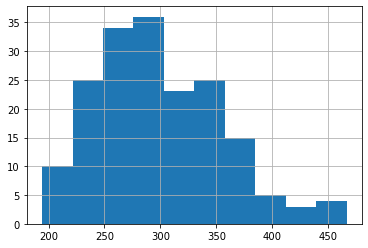

In [80]:
reaction.hist()

<AxesSubplot:>

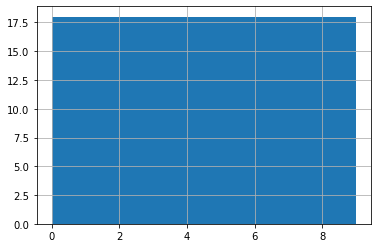

In [81]:
days.hist()

In [82]:

corr, p = stats.pearsonr(days, reaction)
corr, p

(0.5352302262650253, 9.894096322214812e-15)

## Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

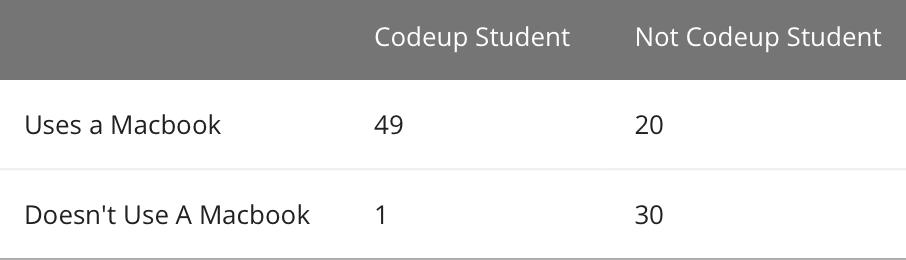

In [83]:
from IPython.display import Image
Image("contingency_table.png")

In [84]:
index = ['Uses a MacBook', "Doesn't Use A Macbook"]
columns = ['Codeup Student', 'Not Codeup Student']

# code borrowed from curriculum:

observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
n = observed.values.sum()


observed

,Codeup Student,Not Codeup Student
Uses a MacBook,49,20
Doesn't Use A Macbook,1,30


h_o : not related/are independent

h_a : related

In [89]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[49 20]
 [ 1 30]]
---
Expected

[[34.5 34.5]
 [15.5 15.5]]
---

chi^2 = 36.6526
p     = 0.0000


In [90]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


## Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [91]:
mpg.head().T

,1,2,3,4,5
manufacturer,audi,audi,audi,audi,audi
model,a4,a4,a4,a4,a4
displ,1.8,1.8,2.0,2.0,2.8
year,1999,1999,2008,2008,1999
cyl,4,4,4,4,6
trans,auto(l5),manual(m5),manual(m6),auto(av),auto(l5)
drv,f,f,f,f,f
cty,18,21,20,21,16
hwy,29,29,31,30,26
fl,p,p,p,p,p


In [92]:
observed = pd.crosstab(mpg.trans, mpg.car_class)
observed



car_class,2seater,compact,midsize,minivan,pickup,subcompact,suv
trans,,,,,,,
auto(av),0,2,3,0,0,0,0
auto(l3),0,1,0,1,0,0,0
auto(l4),1,8,14,8,12,11,29
auto(l5),0,4,5,0,8,4,18
auto(l6),0,0,0,2,0,0,4
auto(s4),0,2,1,0,0,0,0
auto(s5),0,2,0,0,0,0,1
auto(s6),1,5,6,0,0,1,3
manual(m5),0,18,9,0,8,16,7


In [93]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [94]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 0  2  3  0  0  0  0]
 [ 0  1  0  1  0  0  0]
 [ 1  8 14  8 12 11 29]
 [ 0  4  5  0  8  4 18]
 [ 0  0  0  2  0  0  4]
 [ 0  2  1  0  0  0  0]
 [ 0  2  0  0  0  0  1]
 [ 1  5  6  0  0  1  3]
 [ 0 18  9  0  8 16  7]
 [ 3  5  3  0  5  3  0]]
---
Expected

[[ 0  1  0  0  0  0  1]
 [ 0  0  0  0  0  0  0]
 [ 1 16 14  3 11 12 21]
 [ 0  7  6  1  5  5 10]
 [ 0  1  1  0  0  0  1]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  3  2  0  2  2  4]
 [ 1 11 10  2  8  8 15]
 [ 0  3  3  0  2  2  5]]
---

chi^2 = 126.3865
p     = 0.0000


In [95]:
if p < alpha:
    print("We reject the hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis


# Use the data from the employees database to answer these questions:

In [96]:
sql = """
SELECT gender, dept_name
    from employees e
    JOIN dept_emp de USING(emp_no)
    JOIN departments d USING(dept_no)
	WHERE de.to_date > now()
    AND dept_name IN ('Sales', 'Marketing')
;
"""

In [97]:
url = get_db_url('employees')
df = pd.read_sql(sql,url)



In [98]:
df.head()

,gender,dept_name
0,F,Marketing
1,M,Marketing
2,F,Marketing
3,F,Marketing
4,F,Marketing


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52543 entries, 0 to 52542
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   gender     52543 non-null  object
 1   dept_name  52543 non-null  object
dtypes: object(2)
memory usage: 821.1+ KB


### Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

h_o: gender is independent of department

h_a: they are related

In [101]:
observed = pd.crosstab(df.gender, df.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


h_o : gender of employee is independent of marketing/sales

h_a: they are dependent

In [102]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [103]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 5864 14999]
 [ 8978 22702]]
---
Expected

[[ 5893 14969]
 [ 8948 22731]]
---

chi^2 = 0.3240
p     = 0.5692


In [104]:
if p < alpha:
    print("We reject the hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis



### Is an employee's gender independent of whether or not they are or have been a manager?

In [105]:
sql = """

SELECT gender, dept_no
    from employees e
    LEFT JOIN dept_manager dm USING(emp_no)	
;


"""

In [106]:
url = get_db_url('employees')
df = pd.read_sql(sql,url)



In [107]:
df.head()

,gender,dept_no
0,M,None
1,F,None
2,M,None
3,M,None
4,M,None


In [108]:
df.shape

(300024, 2)

In [109]:
df.dept_no.value_counts()

d006    4
d009    4
d004    4
d003    2
d001    2
d005    2
d007    2
d002    2
d008    2
Name: dept_no, dtype: int64

In [110]:
np.where(df.dept_no.isnull(), 0, 1)
# filling in all the 'none' values with zeroes and 1 for the few managers

array([0, 0, 0, ..., 0, 0, 0])

In [116]:
df['is_mgr'] = np.where(df.dept_no.isnull(), 0, 1)

# make a column for is_manager.  see the array created by the numpy command
df.head()

,gender,dept_no,is_mgr
0,M,None,0
1,F,None,0
2,M,None,0
3,M,None,0
4,M,None,0


h_o: gender is independent of whether an employee has been a manager

h_a: they are not independent

In [112]:
observed = pd.crosstab(df.gender, df.is_mgr)
observed

is_mgr,0,1
gender,,
F,120038,13
M,179962,11


In [113]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [114]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[120038     13]
 [179962     11]]
---
Expected

[[120041      9]
 [179958     14]]
---

chi^2 = 1.4567
p     = 0.2275


In [115]:
if p < alpha:
    print("We reject the hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis
